# Project : Youtube adview Prediction

## Problem Context :
    
### Youtube advertisers pay content creators based on adviews and clicks for the goods and services being marketed. They want to estimate the adview based on other metrics like comments, likes etc. The problem statement is therefore to train various regression models and choose the best one to predict the number of adviews. The data needs to be refined and cleaned before feeding in the algorithms for better results.


## Data Description

### The file train.csv contains metrics and other details of about 15000 youtube videos. The metrics include number of views, likes, dislikes, comments and apart from that published date, duration and category are also included.The train.csv file also contains the metric number of adviews which is our target variable for prediction.


## Attribute Information

1) 'vidid' : Unique Identification ID for each video

2) 'adview' : The number of adviews for each video

3) 'views' : The number of unique views for each video

4) 'likes' : The number of likes for each video

5) 'dislikes' : The number of likes for each video

6) 'comment' : The number of unique comments for each video

7) 'published' : The data of uploading the video

8) 'duration' : The duration of the video (in min. and seconds)

9) 'category' : Category niche of each of the video

## Objective

### To build a machine learning regression to predict youtube adview count based on other youtube metrics.

# Importing Libraries

In [1]:
# Importing Required Libraries
import numpy as np      # numerical computations
import pandas as pd     # data manipulations
import matplotlib.pyplot as plt  # Used for visualization
%matplotlib inline
import seaborn as sns         # Used for visualization
from datetime import datetime    # to convert to date
from numpy import math          # Used for maths operation
from scipy import stats             #used for statistical analysis
import warnings
warnings.filterwarnings('ignore')

# Dataset initialization

In [2]:
# Directory path
import os
os.chdir(r'C:\Users\Lenovo\Downloads\Internship studio\Project')

In [3]:
# Loading Dataset
data = pd.read_csv('train.csv')
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [4]:
# Checking Top 5 rows of the dataset
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [5]:
# Checking last 5 rows of the dataset
data.tail()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G
14998,VID_8534,1,15212,22,5,4,2016-02-19,PT1M1S,D


In [6]:
# Getting the shape of dataset: No of rows and column of the dataset
data.shape

(14999, 9)

There are 14999 observations in the dataset. And has 9 columns.

In [7]:
# Getting all datatypes of features
print("Dataset Datatypes:\n", data.dtypes)

Dataset Datatypes:
 vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


we can see that for each of the columns, But adview have only in int data type and other columns that have in object date types.

In [8]:
# getting all details of the features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [9]:
# let's look at the statistical aspects of the dataframes
data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


## Data Cleaning

In [10]:
# checking missing value
data.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

There are no missing value present in our dataset so, we don't have to deal with that.

In [11]:
# checking duplicate values
len(data[data.duplicated()])

0

In [12]:
# Removing character "F" present in data
data =  data[data.views!='F']
data =  data[data.likes!='F']
data =  data[data.dislikes!='F']
data =  data[data.comment!='F']

In [13]:
data.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

## Data Preprocessing

In [14]:
# Transform some categorical attributes into numerical values using
data["category"] = data["category"].replace({'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8})
data["category"].head()

0    6
1    4
2    3
3    8
4    4
Name: category, dtype: int64

In [15]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [16]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [17]:
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

In [18]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


time1 = time.apply(func_sec)
data ["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [19]:
# Transform data type of attributes into integer data type.
data['views'] = data['views'].astype(int)
data['comment'] = data['comment'].astype(int)
data['likes'] = data['likes'].astype(int)
data['dislikes'] = data['dislikes'].astype(int)

In [20]:
# Again check datatype
data.dtypes

vidid        int32
adview       int64
views        int32
likes        int32
dislikes     int32
comment      int32
published    int32
duration     int64
category     int64
dtype: object

## Visualisation

In [21]:
data.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

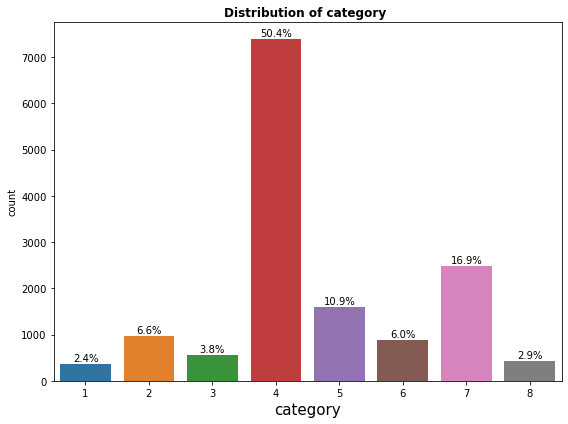

In [22]:
#plot the count plot to check the data distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'category',data = data)
plt.xlabel("category", fontsize= 15)
plt.title('Distribution of category ',weight ='bold', fontsize= 12)

# This step is used for showing the percentage on the graph
total = len(data)
for p in ax.patches:       
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

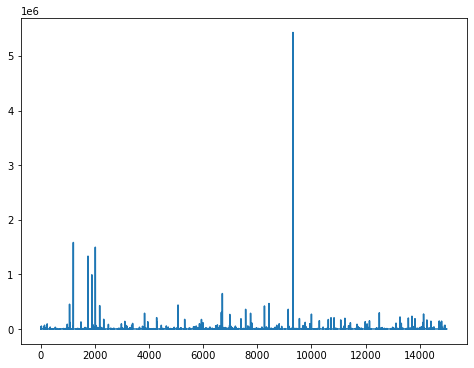

In [23]:
# distribution of adview
plt.figure(figsize=(8,6))
plt.plot(data["adview"])
plt.show()

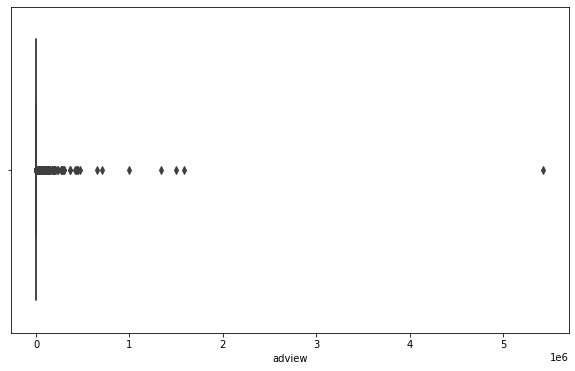

In [24]:
# lets check outlier through boxplot
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="adview", data=data)

In [25]:
# Remove videos with adview greater than 2000000 as outlier
data = data[data["adview"] <2000000]

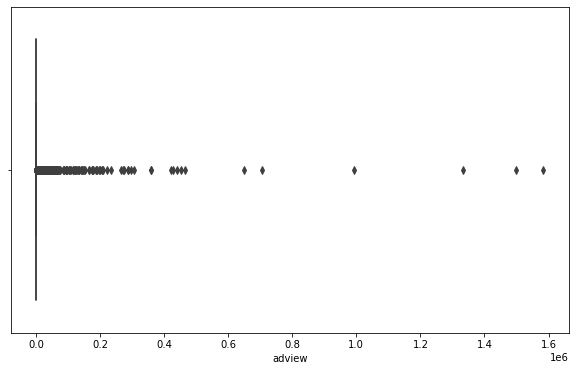

In [26]:
# lets check again
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="adview", data=data)

<AxesSubplot:>

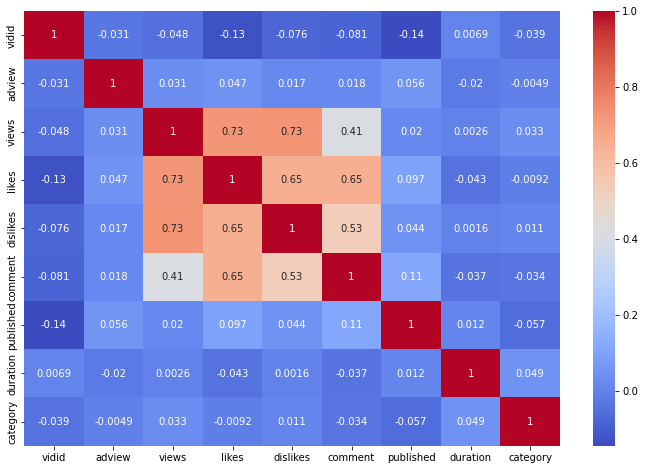

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

Above heatmap It seems that there is some negatively correlated feature like duration, likes and many more. And vidID is unimportant and has no role in prediction so we will remove it.

In [28]:
# drop the features that are in no use
data.drop(['vidid'],axis = 1,inplace = True)

In [29]:
# copying new dataset for model
new_data = data.copy()

## Machine Learning Model - Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Evaluation Metrics
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from scipy.stats import zscore

In [31]:
new_data.columns

Index(['adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [32]:
# selecting the independent and dependent variable.

#independent variables
X = new_data.drop(['adview'],axis = 1)

# dependent variable 
y = new_data['adview']

In [33]:
# shape of independent and dependent feature
print('Shape of independent variable:', X.shape)
print('Shape of dependent variable:', y.shape)

Shape of independent variable: (14636, 7)
Shape of dependent variable: (14636,)


In [34]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

In [35]:
print(X_train.shape)
print(X_test.shape)

(11708, 7)
(2928, 7)


In [36]:
print(y_train.shape)
print(y_test.shape)

(11708,)
(2928,)


In [37]:
# Normalise Data
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.17413679689005462

In [38]:
# storing the test set metrics value in a dataframe for later comparison
test_data = pd.DataFrame()

# Linear Regression

In [39]:
# Fitting the data to Linear Regression model
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [40]:
#Checking efficiency of training model
LR_Regression_score = Lin_reg.score(X_train, y_train)
print('Regression score:', LR_Regression_score)
print('\n')
#getting regression coefficients 
print('Regression intercept:', Lin_reg.intercept_)
print('\n')
print('Regression coefficient; ', Lin_reg.coef_)

Regression score: 0.003796024397834774


Regression intercept: -1893.3434130747378


Regression coefficient;  [ 22438.46382043 -11627.8112832    -784.17887551  -5799.0476644
   5936.66673993  -9704.21257432   -227.6622244 ]


In [41]:
# Getting the y_train and y-test value
y_train_pred= Lin_reg.predict(X_train)
y_test_pred= Lin_reg.predict(X_test)

In [42]:
# Evluation Matrix for Linear Regression (Test data)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = math.sqrt(mean_squared_error(y_test, y_test_pred))
MAE = mean_absolute_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

print('Testing Error\nMSE:',MSE,'\nRMSE:',RMSE,'\nMAE:',MAE,'\nR2:',R2)

Testing Error
MSE: 1367177725.0637841 
RMSE: 36975.36646287342 
MAE: 4008.57759190279 
R2: 0.002444099196596272


## Cross Validation for Linear Regression

In [43]:
# Cross Validation for linear regression
Lin_reg = LinearRegression()

param_grid = { 'fit_intercept': [True, False], 'normalize': [True, False] }

# Perform grid search cross-validation
lin_grid_search = GridSearchCV(estimator=Lin_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lin_grid_search.fit(X_train,y_train)

lin_best_params = lin_grid_search.best_params_
lin_best_score = -lin_grid_search.best_score_

lin_best_model = lin_grid_search.best_estimator_

# Calculate evaluation metrics for linear regression
lin_predictions = lin_best_model.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_test, lin_predictions)
lin_r2 = r2_score(y_test, lin_predictions)

print("Evaluation Metrics (Linear Regression)")
print("Best Parameters:", lin_best_params)
print("Best MSE Score:", lin_best_score)
print("MSE:", lin_mse)
print("RMSE:", lin_rmse)
print("MAE:", lin_mae)
print("R2:", lin_r2)

Evaluation Metrics (Linear Regression)
Best Parameters: {'fit_intercept': True, 'normalize': True}
Best MSE Score: 627530344.5188208
MSE: 1367177725.0637841
RMSE: 36975.36646287342
MAE: 4008.57759190279
R2: 0.002444099196596272


In [44]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round((lin_mae),2),
       'MSE':round((lin_mse),2),
       'RMSE':round((lin_rmse),2),
       'R2_score':round((lin_r2),2)
       }
test_data = test_data.append(dict1,ignore_index=True)

## SVM

In [45]:
# SVM model training and prediction
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

y_train_svm_pred= svm_model.predict(X_train)
y_test_svm_pred = svm_model.predict(X_test)

# Model evaluation
MSE = mean_squared_error(y_test, y_test_svm_pred)
RMSE = math.sqrt(mean_squared_error(y_test, y_test_svm_pred))
MAE = mean_absolute_error(y_test, y_test_svm_pred)
R2 = r2_score(y_test, y_test_svm_pred)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2 Score:", R2)

MSE: 1375882218.986942
RMSE: 37092.88636634984
MAE: 2321.652584155491
R2 Score: -0.003907100883224102


## Cross Validation for SVM

In [46]:
# Cross Validation for Support Vector Machine
svm = SVR()

svm_param_grid = { 'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'] }

# Perform grid search cross-validation
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring='neg_mean_squared_error')
svm_grid_search.fit(X_train,y_train)

svm_best_params = svm_grid_search.best_params_
svm_best_score = -svm_grid_search.best_score_

# Calculate evaluation metrics for Support Vector Machine
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(X_test)

svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)


print("Evaluation Metrics (SVM Regression)")
print("Best Parameters:", svm_best_params)
print("Best MSE Score:", svm_best_score)
print("MSE:", svm_mse)
print("RMSE:", svm_rmse)
print("MAE:", svm_mae)
print("R2:", svm_r2)

Evaluation Metrics (SVM Regression)
Best Parameters: {'C': 10, 'kernel': 'poly'}
Best MSE Score: 631708719.188815
MSE: 1375781015.6742141
RMSE: 37091.52215364333
MAE: 2322.0885585594033
R2: -0.003833258280362628


In [47]:
dict2={'Model':'SVM regression',
       'MAE':round((svm_mae),2),
       'MSE':round((svm_mse),2),
       'RMSE':round((svm_rmse),2),
       'R2_score':round((svm_r2),2)
       }
test_data = test_data.append(dict2,ignore_index=True)

## Decision Tree Regressor

In [48]:
# DT model training and prediction
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)

y_train_DT_pred= DT_model.predict(X_train)
y_test_DT_pred = DT_model.predict(X_test)

# Model evaluation
MSE = mean_squared_error(y_test, y_test_DT_pred)
RMSE = math.sqrt(mean_squared_error(y_test, y_test_DT_pred))
MAE = mean_absolute_error(y_test, y_test_DT_pred)
R2 = r2_score(y_test, y_test_DT_pred)


print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2 Score:", R2)

MSE: 4471008519.646174
RMSE: 66865.60042089038
MAE: 5840.446038251366
R2 Score: -2.262253948079247


## Cross Validation for Decision Tree

In [49]:
# # Cross Validation for Decision Tree
DT_model = DecisionTreeRegressor()

dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }


dt_grid_search = GridSearchCV(estimator=DT_model, param_grid=dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

dt_best_params = dt_grid_search.best_params_
dt_best_score = -dt_grid_search.best_score_

# Calculate evaluation metrics for Decision Tree
dt_best_model = dt_grid_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Evaluation Metrics (DT Regression)")
print("Best Parameters:", dt_best_params)
print("Best MSE Score:", dt_best_score)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)
print("R2:", dt_r2)

Evaluation Metrics (DT Regression)
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best MSE Score: 585160297.4170223
MSE: 1429657974.9622545
RMSE: 37810.81822656387
MAE: 3288.1328317828043
R2: -0.043144371729510134


In [50]:
dict3={'Model':'DT regression',
       'MAE':round((dt_mae),2),
       'MSE':round((dt_mse),2),
       'RMSE':round((dt_rmse),2),
       'R2_score':round((dt_r2),2)
       }
test_data = test_data.append(dict3,ignore_index=True)

## Random Forest Regressor


In [51]:
# RF model training and prediction
RF_model = RandomForestRegressor(n_estimators = 200, max_depth = 25, min_samples_split=15,min_samples_leaf=2)
RF_model.fit(X_train, y_train)

y_train_RF_pred= RF_model.predict(X_train)
y_test_RF_pred = RF_model.predict(X_test)

# Model evaluation
MSE = mean_squared_error(y_test, y_test_RF_pred)
RMSE = math.sqrt(mean_squared_error(y_test, y_test_RF_pred))
MAE = mean_absolute_error(y_test, y_test_RF_pred)
R2 = r2_score(y_test, y_test_RF_pred)


print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2 Score:", R2)

MSE: 1444454525.553348
RMSE: 38005.98012883431
MAE: 3991.4626059538623
R2 Score: -0.05394061722348398


## Cross Validation for Random Forest

In [52]:
# Cross Validation for Random Forest

RF_model = RandomForestRegressor()

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid_search = GridSearchCV(estimator=RF_model, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_score = -rf_grid_search.best_score_


# Calculate evaluation metrics for Random Forest
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Evaluation Metrics(RF Regression)")
print("Best Parameters:", rf_best_params)
print("Best MSE Score:", rf_best_score)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

Evaluation Metrics(RF Regression)
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best MSE Score: 478529641.0324438
MSE: 1467372698.9786634
RMSE: 38306.30103492979
MAE: 3819.184141160928
R2: -0.07066277317800163


In [53]:
dict4={'Model':'RF regression',
       'MAE':round((rf_mae),2),
       'MSE':round((rf_mse),2),
       'RMSE':round((rf_rmse),2),
       'R2_score':round((rf_r2),2)
       }
test_data = test_data.append(dict4,ignore_index=True)

## Artificial Neural Network

In [54]:
# Artificial Neural Network
import keras
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError, MeanSquaredError

In [55]:
# Build the Artificial Neural Network
ann = keras.models.Sequential([
    Dense(6, activation="relu", 
    input_shape=X_train.shape[1:]), 
    Dense(6,activation="relu"),Dense(1)])


# Compile the model
ann.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

# Train the model
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, rmse, mae = ann.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test RMSE:", rmse)
print("Test MAE:", mae)



Epoch 1/50
293/293 [==============================] - 2s 4ms/step - loss: 749707712.0000 - root_mean_squared_error: 27380.7910 - mean_absolute_error: 1617.2994 - val_loss: 160278960.0000 - val_root_mean_squared_error: 12660.1328 - val_mean_absolute_error: 1218.5157
Epoch 2/50
293/293 [==============================] - 1s 3ms/step - loss: 749701568.0000 - root_mean_squared_error: 27380.6797 - mean_absolute_error: 1616.8574 - val_loss: 160271952.0000 - val_root_mean_squared_error: 12659.8555 - val_mean_absolute_error: 1218.7692
Epoch 3/50
293/293 [==============================] - 1s 3ms/step - loss: 749688832.0000 - root_mean_squared_error: 27380.4453 - mean_absolute_error: 1618.1189 - val_loss: 160259648.0000 - val_root_mean_squared_error: 12659.3701 - val_mean_absolute_error: 1221.0599
Epoch 4/50
293/293 [==============================] - 1s 3ms/step - loss: 749667968.0000 - root_mean_squared_error: 27380.0645 - mean_absolute_error: 1621.5841 - val_loss: 160240368.0000 - val_root_mean

Epoch 32/50
293/293 [==============================] - 1s 2ms/step - loss: 747145920.0000 - root_mean_squared_error: 27333.9707 - mean_absolute_error: 2523.0046 - val_loss: 158668416.0000 - val_root_mean_squared_error: 12596.3652 - val_mean_absolute_error: 2128.1030
Epoch 33/50
293/293 [==============================] - 1s 2ms/step - loss: 747090368.0000 - root_mean_squared_error: 27332.9531 - mean_absolute_error: 2560.1260 - val_loss: 158650896.0000 - val_root_mean_squared_error: 12595.6699 - val_mean_absolute_error: 2161.0264
Epoch 34/50
293/293 [==============================] - 1s 2ms/step - loss: 747039424.0000 - root_mean_squared_error: 27332.0215 - mean_absolute_error: 2595.1797 - val_loss: 158635936.0000 - val_root_mean_squared_error: 12595.0762 - val_mean_absolute_error: 2193.5857
Epoch 35/50
293/293 [==============================] - 1s 2ms/step - loss: 746992704.0000 - root_mean_squared_error: 27331.1680 - mean_absolute_error: 2620.1489 - val_loss: 158624960.0000 - val_root_

## Cross Validation For ANN

In [56]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [58]:
# Cross Validation for ANN
# Define the parameter grid for GridSearchCV
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create KerasRegressor 
neural_network = KerasRegressor(build_fn=create_model)

param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search cross-validation
ann_grid_search = GridSearchCV(estimator=neural_network, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
ann_grid_search.fit(X_train, y_train)

ann_best_params = ann_grid_search.best_params_
ann_best_score = -ann_grid_search.best_score_

# Make predictions on the test set using the best model
ann_best_model = ann_grid_search.best_estimator_
ann_y_pred = ann_best_model.predict(X_test)


# Calculate evaluation metrics
ann_mse = mean_squared_error(y_test, ann_y_pred)
ann_rmse = np.sqrt(ann_mse)
ann_mae = mean_absolute_error(y_test, ann_y_pred)
ann_r2 = r2_score(y_test, ann_y_pred)

print("Evaluation Metrics (Neural Network)")
print("Best Parameters:", ann_best_params)
print("Best MSE Score:", ann_best_score)
print("MSE:", ann_mse)
print("RMSE:", ann_rmse)
print("MAE:", ann_mae)
print("R2:", ann_r2)

Epoch 1/10
244/244 [==============================] - 1s 3ms/step - loss: 452963776.0000
Epoch 2/10
244/244 [==============================] - 1s 3ms/step - loss: 452896736.0000
Epoch 3/10
244/244 [==============================] - 1s 3ms/step - loss: 452645856.0000
Epoch 4/10
244/244 [==============================] - 1s 3ms/step - loss: 452242592.0000
Epoch 5/10
244/244 [==============================] - 1s 3ms/step - loss: 451785312.0000
Epoch 6/10
244/244 [==============================] - 1s 3ms/step - loss: 451376256.0000
Epoch 7/10
244/244 [==============================] - 1s 3ms/step - loss: 451061024.0000
Epoch 8/10
244/244 [==============================] - 1s 3ms/step - loss: 450832128.0000
Epoch 9/10
244/244 [==============================] - 1s 3ms/step - loss: 450678176.0000
Epoch 10/10
244/244 [==============================] - 1s 2ms/step - loss: 450573856.0000
Epoch 1/10
244/244 [==============================] - 1s 2ms/step - loss: 560516992.0000
Epoch 2/10
244/244 [

244/244 [==============================] - 1s 2ms/step - loss: 558295296.0000
Epoch 13/20
244/244 [==============================] - 0s 2ms/step - loss: 558266688.0000
Epoch 14/20
244/244 [==============================] - 0s 2ms/step - loss: 558234112.0000
Epoch 15/20
244/244 [==============================] - 0s 2ms/step - loss: 558214720.0000
Epoch 16/20
244/244 [==============================] - 0s 2ms/step - loss: 558198400.0000
Epoch 17/20
244/244 [==============================] - 0s 2ms/step - loss: 558177344.0000
Epoch 18/20
244/244 [==============================] - 0s 2ms/step - loss: 558154112.0000
Epoch 19/20
244/244 [==============================] - 0s 2ms/step - loss: 558141760.0000
Epoch 20/20
244/244 [==============================] - 0s 2ms/step - loss: 558116672.0000
Epoch 1/20
244/244 [==============================] - 1s 2ms/step - loss: 881872192.0000
Epoch 2/20
244/244 [==============================] - 0s 2ms/step - loss: 881830912.0000
Epoch 3/20
244/244 [====

122/122 [==============================] - 0s 2ms/step - loss: 452844448.0000
Epoch 4/10
122/122 [==============================] - 0s 2ms/step - loss: 452645248.0000
Epoch 5/10
122/122 [==============================] - 0s 2ms/step - loss: 452364064.0000
Epoch 6/10
122/122 [==============================] - 0s 2ms/step - loss: 452041088.0000
Epoch 7/10
122/122 [==============================] - 0s 2ms/step - loss: 451691936.0000
Epoch 8/10
122/122 [==============================] - 0s 2ms/step - loss: 451376288.0000
Epoch 9/10
122/122 [==============================] - 0s 2ms/step - loss: 451127008.0000
Epoch 10/10
122/122 [==============================] - 0s 2ms/step - loss: 450916800.0000
Epoch 1/10
122/122 [==============================] - 1s 2ms/step - loss: 560522880.0000
Epoch 2/10
122/122 [==============================] - 0s 2ms/step - loss: 560489216.0000
Epoch 3/10
122/122 [==============================] - 0s 2ms/step - loss: 560384832.0000
Epoch 4/10
122/122 [===========

122/122 [==============================] - 0s 3ms/step - loss: 558423232.0000
Epoch 15/20
122/122 [==============================] - 0s 3ms/step - loss: 558365632.0000
Epoch 16/20
122/122 [==============================] - 0s 2ms/step - loss: 558320896.0000
Epoch 17/20
122/122 [==============================] - 0s 2ms/step - loss: 558294208.0000
Epoch 18/20
122/122 [==============================] - 0s 2ms/step - loss: 558267904.0000
Epoch 19/20
122/122 [==============================] - 0s 2ms/step - loss: 558237824.0000
Epoch 20/20
122/122 [==============================] - 0s 2ms/step - loss: 558223168.0000
Epoch 1/20
122/122 [==============================] - 1s 2ms/step - loss: 881876672.0000
Epoch 2/20
122/122 [==============================] - 0s 2ms/step - loss: 881854656.0000
Epoch 3/20
122/122 [==============================] - 0s 2ms/step - loss: 881771008.0000
Epoch 4/20
122/122 [==============================] - 0s 2ms/step - loss: 881594240.0000
Epoch 5/20
122/122 [======

366/366 [==============================] - 1s 2ms/step - loss: 629698304.0000
Epoch 6/20
366/366 [==============================] - 1s 2ms/step - loss: 629353536.0000
Epoch 7/20
366/366 [==============================] - 1s 2ms/step - loss: 629167296.0000
Epoch 8/20
366/366 [==============================] - 1s 2ms/step - loss: 629065728.0000
Epoch 9/20
366/366 [==============================] - 1s 2ms/step - loss: 629001344.0000
Epoch 10/20
366/366 [==============================] - 1s 2ms/step - loss: 628936704.0000
Epoch 11/20
366/366 [==============================] - 1s 2ms/step - loss: 628894080.0000
Epoch 12/20
366/366 [==============================] - 1s 2ms/step - loss: 628850304.0000
Epoch 13/20
366/366 [==============================] - 1s 2ms/step - loss: 628814976.0000
Epoch 14/20
366/366 [==============================] - 1s 2ms/step - loss: 628779008.0000
Epoch 15/20
366/366 [==============================] - 1s 2ms/step - loss: 628741056.0000
Epoch 16/20
366/366 [=====

In [59]:
dict5={'Model':'Neural Network',
       'MAE':round((ann_mae),2),
       'MSE':round((ann_best_score),2),
       'RMSE':round((ann_rmse),2),
       'R2_score':round((ann_r2),2)
       }
test_data=test_data.append(dict5,ignore_index=True)

## Overall Evaluation Metrics

In [60]:
test_data

,Model,MAE,MSE,RMSE,R2_score
0,Linear regression,4008.58,1.367178e+09,36975.37,0.00
1,SVM regression,2322.09,1.375781e+09,37091.52,-0.00
2,DT regression,3288.13,1.429658e+09,37810.82,-0.04
3,RF regression,3819.18,1.467373e+09,38306.30,-0.07
4,Neural Network,3766.19,6.288322e+08,37002.80,0.00


## Save your model

In [61]:
# Save the model to a file using pickle
import pickle
with open('Randomforest_youtubeadview.pkl', 'wb') as file:
    pickle.dump(RF_model, file)
    print("Model saved successfully.")

Model saved successfully.


In [62]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# Conclusion

#### 1) In this project, we aimed To build a machine learning regression to predict youtube adview count based on other youtube metrics. We performed extensive data analysis and explored the relationships between metrics such as views, likes, dislikes, and comments. Through visualization, we gained valuable insights into the data and identified potential patterns.

#### 2) We experimented with multiple regression models, including linear regression, decision tree, support vector machine, and random forest. After evaluating their performance using metrics such as mean squared error, mean absolute error, and R-squared (R2) score.

#### 3) we also build neural network model and there found that the neural network model trained using Keras outperformed the other models. Its ability to capture complex relationships within the data allowed for more accurate predictions.

#### 4) To assess the generalization performance of our models, we utilized cross-validation techniques. This provided an estimation of how well the models would perform on unseen data, enhancing their reliability.

#### 5) In conclusion, our project successfully developed a predictive model for YouTube adview prediction. By considering various metrics and utilizing advanced techniques such as neural networks and cross-validation, we were able to create a robust and accurate model that can provide valuable insights for YouTube advertisers in predicting the number of adviews for their content.

#### 6) In spite of all Regression models, Linear Regression are performing better than other after cross validation with mse value.